In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# read in test image
landscape = cv2.imread("../data/otsu/landscape.jpg")
landscape_gray = cv2.cvtColor(landscape, cv2.COLOR_BGR2GRAY)
print(landscape_gray.shape)
print(landscape_gray.dtype)

(1600, 2000)
uint8


In [132]:
def plot(img, title, color = True):   
    # plt.figure(figsize=(10,10))
    plt.style.use("seaborn-v0_8-white")
    plt.title(title)
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    plt.show()

def plot_pair(img1, img2):
    # plt.figure(figsize=(10,10))
    plt.style.use("seaborn-v0_8-white")
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()

# plots mask with green overlay
def plot_overlay(img, mask):
    plt.style.use("seaborn-v0_8-white")
    color_mask = np.stack([mask, mask, mask], axis=2)
    color_mask[:, :, 0][mask == 255] = 0
    color_mask[:, :, 2][mask == 255] = 0

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(color_mask, alpha=0.2)
    plt.show()

In [61]:
def otsu_threshold(img):
    # apply otsu thresholding
    t, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return t, mask

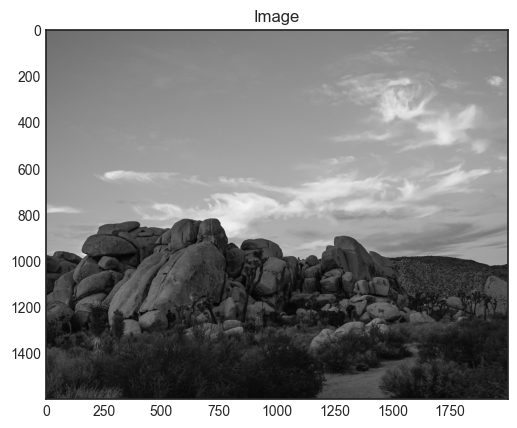

In [134]:
# plt.style.use("seaborn-v0_8-white")
plot(landscape_gray, "Image")

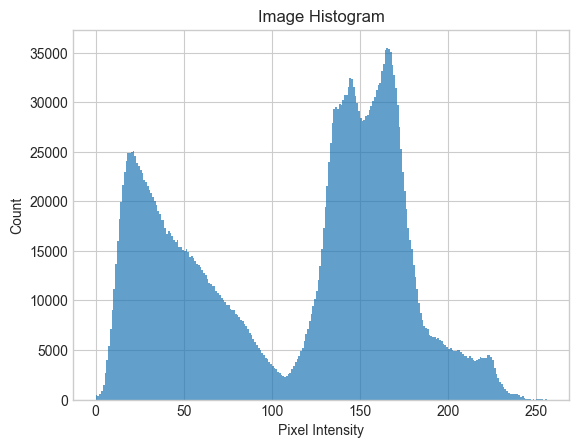

In [160]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.hist(landscape_gray.ravel(), 256, [0, 256], alpha=0.7)
plt.title("Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()

In [93]:
thresh, mask = otsu_threshold(landscape_gray)

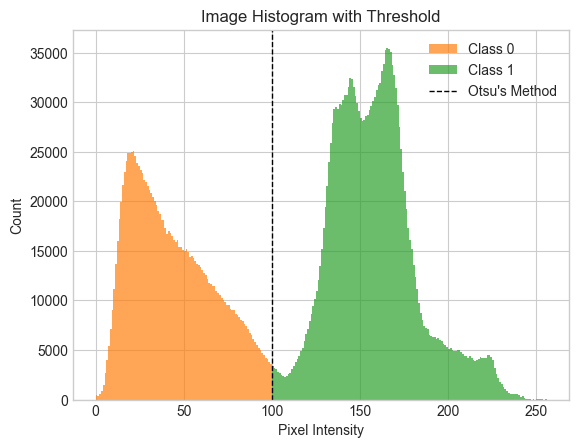

: 

In [166]:
plt.style.use("seaborn-v0_8-whitegrid")

x = landscape_gray.ravel()

plt.plot([])
plt.hist(x[x < thresh], 256, [0, 256], alpha=0.7, label="Class 0")
plt.hist(x[x >= thresh], 256, [0, 256], alpha=0.7, label="Class 1")
plt.axvline(x=thresh, color="black", linestyle="--", linewidth=1, label="Otsu's Method")
plt.title("Image Histogram with Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.legend()
plt.show()

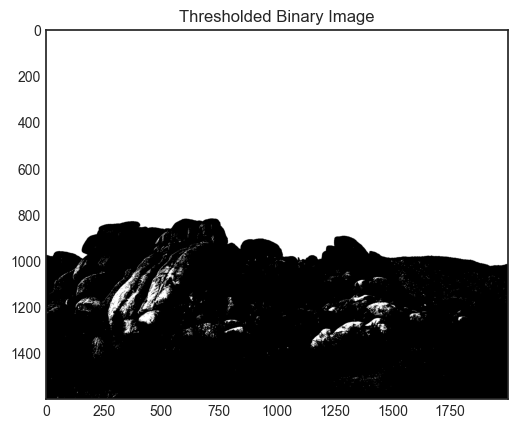

In [139]:

plot(mask, "Thresholded Binary Image")


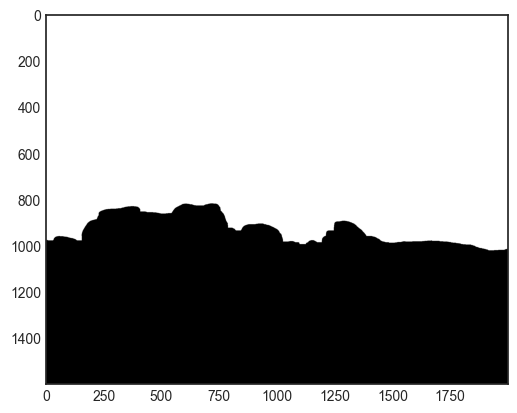

In [131]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
# closing = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
closing = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

# eroded = cv2.erode(mask.copy(), None, iterations=3 + 1)

plot(closing)

# Otsu Variance Plot

In [145]:
def intraclass_variance(threshold, img):
    return np.nansum([
        #   weight   ·  intra-class variance
        np.mean(cls) * np.var(img, where=cls) for cls in [img >= threshold, img < threshold]
    ])

def class_0_variance(threshold, img):
    return np.var(img, where=img < threshold)

def class_1_variance(threshold, img):
    return np.var(img, where=img >= threshold)

def otsu_method_trace(img): 
    return {
        "intraclass": [intraclass_variance(threshold, img) for threshold in range(img.min(), img.max() + 1)],
        "class_0": [class_0_variance(threshold, img) for threshold in range(img.min(), img.max() + 1)],
        "class_1": [class_1_variance(threshold, img) for threshold in range(img.min(), img.max() + 1)],
    } 

In [146]:
trace = otsu_method_trace(landscape_gray)

/Users/joypauls/Documents/code/blog-scripts/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/joypauls/Documents/code/blog-scripts/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/joypauls/Documents/code/blog-scripts/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


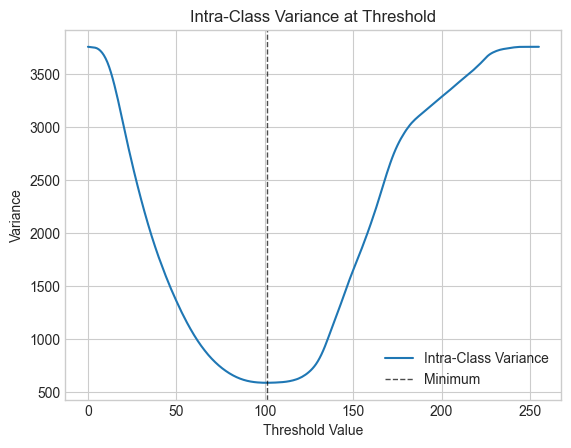

In [161]:
plt.plot(trace["intraclass"], label="Intra-Class Variance")
plt.axvline(x=np.argmin(trace["intraclass"]), color="black", linestyle="--", linewidth=1, alpha=0.7, label="Minimum")
plt.title("Intra-Class Variance at Threshold")
plt.xlabel("Threshold Value")
plt.ylabel("Variance")
plt.legend()
plt.show()

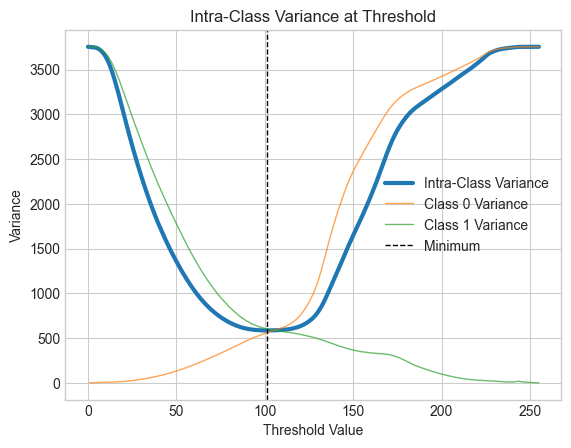

In [163]:
plt.plot(trace["intraclass"], linewidth=3, label="Intra-Class Variance")
plt.plot(trace["class_0"], linewidth=1, alpha=0.7, label="Class 0 Variance")
plt.plot(trace["class_1"], linewidth=1, alpha=0.7, label="Class 1 Variance")
plt.axvline(x=np.argmin(trace["intraclass"]), color="black", linestyle="--", linewidth=1, label="Minimum")
plt.title("Intra-Class Variance at Threshold")
plt.xlabel("Threshold Value")
plt.ylabel("Variance")
plt.legend()
plt.show()

In [ ]:
plt.plot(trace["intraclass"], label="Intra-Class Variance")
plt.axvline(x=np.argmin(trace["intraclass"]), color="black", linestyle="--", linewidth=1, alpha=0.7, label="Minimum")
plt.title("Intra-Class Variance at Threshold")
plt.xlabel("Threshold Value")
plt.ylabel("Variance")
plt.legend()
plt.show()